In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
leasesData = pd.read_csv('Leases.csv')

In [5]:
leasesData.shape
leasesData.head()
leasesData.info()
leasesData.describe()
leasesData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            194685 non-null  int64  
 1   quarter                         194685 non-null  object 
 2   monthsigned                     193822 non-null  float64
 3   market                          194685 non-null  object 
 4   building_name                   157999 non-null  object 
 5   building_id                     194685 non-null  object 
 6   address                         194685 non-null  object 
 7   region                          194685 non-null  object 
 8   city                            194685 non-null  object 
 9   state                           194685 non-null  object 
 10  zip                             194684 non-null  float64
 11  internal_submarket              194685 non-null  object 
 12  internal_class  

year                                   0
quarter                                0
monthsigned                          863
market                                 0
building_name                      36686
building_id                            0
address                                0
region                                 0
city                                   0
state                                  0
zip                                    1
internal_submarket                     0
internal_class                         9
leasedSF                               0
company_name                      157469
internal_industry                 168284
transaction_type                     539
internal_market_cluster           118847
costarID                               0
space_type                          7545
CBD_suburban                           0
RBA                                49144
available_space                    49144
availability_proportion            49144
internal_class_r

In [6]:
OccupancyData = pd.read_csv('Major_Market_Occupancy_Data-revised.csv')
PriceAvailabilityData = pd.read_csv('Price_and_Availability_Data.csv')
UnemploymentData = pd.read_csv('Unemployment.csv')

In [7]:
leasesDataCleaned = leasesData.drop(columns=[
    "building_name",
    "building_id",
    "monthsigned",
    "company_name",
    "costarID",
    "internal_market_cluster",
    "direct_available_space",
    "direct_internal_class_rent",
    "direct_overall_rent",
    "sublet_internal_class_rent",
    "sublet_overall_rent"
])

In [16]:
#loading data
leases_df = pd.read_csv("Leases.csv")
disasters_df = pd.read_csv("US_Natural_Disasters_by_Quarter.csv")

# Extracting year and quarter from the dataset
disasters_df[['quarter', 'year']] = disasters_df['Quarter'].str.extract(r'(Q\d)\s*(\d{4})')
disasters_df = disasters_df.dropna(subset=['year', 'quarter'])
disasters_df['year'] = disasters_df['year'].astype(int)

# Clean up data of damages, eliminating ranges
valid_damages = disasters_df['Estimated Damages'].str.match(r'^\d+(\.\d+)?$')
disasters_df = disasters_df[valid_damages].copy()

# Convert damages to float (billions to raw numbers)
disasters_df['Estimated Damages'] = disasters_df['Estimated Damages'].astype(float) * 1e9

# Split and explode affected states into separate rows
disasters_df['States Affected'] = disasters_df['States Affected'].str.split(r',\s*')
disasters_exploded = disasters_df.explode('States Affected')
disasters_exploded['States Affected'] = disasters_exploded['States Affected'].str.strip()

# Merge lease data with other data
merged_df = leases_df.merge(
    disasters_exploded,
    left_on=['year', 'quarter', 'state'],
    right_on=['year', 'quarter', 'States Affected'],
    how='left',
    indicator=True
)

# add flag to lease data to show if affected or not
merged_df['Disaster_Affected'] = np.where(merged_df['_merge'] == 'both', 1, 0)

# Takes only data we want
analysis_df = merged_df[['year', 'quarter', 'state', 'leasing', 'overall_rent', 'Disaster_Affected']]

# Preview
print(analysis_df.head())

   year quarter state    leasing  overall_rent  Disaster_Affected
0  2018      Q1    GA  1205126.0     24.345689                  0
1  2018      Q1    GA  1205126.0     24.345689                  0
2  2018      Q1    GA  1205126.0     24.345689                  0
3  2018      Q1    GA   715742.0     24.345689                  0
4  2018      Q1    GA  1205126.0     24.345689                  0


In [15]:
# Mapping of full state names to abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Apply the mapping to disaster states
disasters_exploded['States Affected'] = disasters_exploded['States Affected'].map(us_state_abbrev)

In [17]:
grouped_stats = analysis_df.groupby('Disaster_Affected')[['leasing', 'overall_rent']].mean()
print("Average Leasing and Rent (0 = No Disaster, 1 = Disaster):\n")
print(grouped_stats)

Average Leasing and Rent (0 = No Disaster, 1 = Disaster):

                        leasing  overall_rent
Disaster_Affected                            
0                  1.327221e+06     39.730471


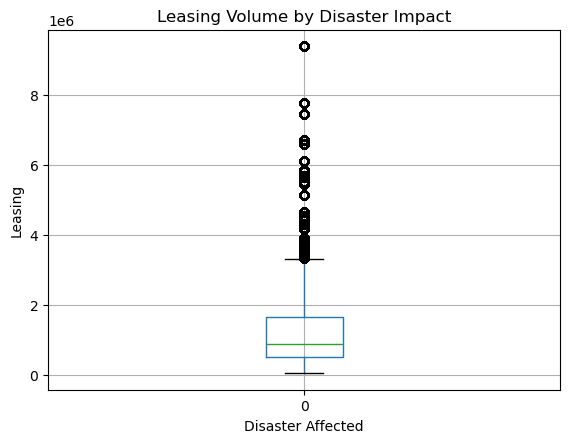

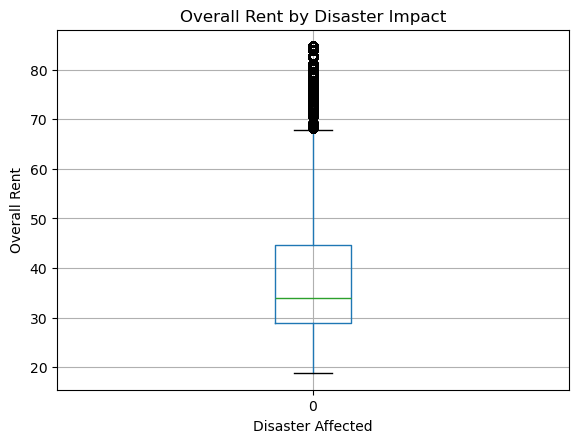

In [18]:
import matplotlib.pyplot as plt

# Boxplot for leasing
analysis_df.boxplot(column='leasing', by='Disaster_Affected')
plt.title('Leasing Volume by Disaster Impact')
plt.suptitle('')
plt.xlabel('Disaster Affected')
plt.ylabel('Leasing')
plt.show()

# Boxplot for overall rent
analysis_df.boxplot(column='overall_rent', by='Disaster_Affected')
plt.title('Overall Rent by Disaster Impact')
plt.suptitle('')
plt.xlabel('Disaster Affected')
plt.ylabel('Overall Rent')
plt.show()

In [19]:
print("Disaster-affected leases:", analysis_df['Disaster_Affected'].sum())
print("Total leases:", len(analysis_df))
print("Unique disaster-affected quarters:", analysis_df[analysis_df['Disaster_Affected'] == 1][['year', 'quarter']].drop_duplicates())

Disaster-affected leases: 0
Total leases: 194685
Unique disaster-affected quarters: Empty DataFrame
Columns: [year, quarter]
Index: []
